# Here are the rests the figures present in the supplementary material of the article: The Area of the Convex Hull, a robust Functional Statistical Depth for Functional Data.

## The notebook take approximatively 20 minutes to be run. 

### Some csv are already here, if you want to rerun the entire experiments, you have to run the .py script in the same folder.

### Importing libraries:

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd
from functools import partial
from itertools import combinations
import csv
import warnings
warnings.filterwarnings("ignore")
import FCHD
import os

### Normal datasets:

In [2]:
X = pd.read_csv('Dataset_brownian_geom.csv', header=None)
X = X.as_matrix()
X = X[:100]
Y = pd.read_csv('Dataset_deux.csv', header=None)
Y = Y.as_matrix()
Y = Y[:100]

### Ranking metrics:

In [3]:
def kendall_tau(x,y):
    n = x.shape[0]
    S = 0
    z=0
    for i in range(n):
        for j in range(i+1,n):
            S += 1 * ( ((x[i] - x[j]) * (y[i] - y[j])) < 0 )
            
    return S / (n * (n - 1) / 2  )

## Functional Stahel-Donoho-Outlyingness, Functional Tukey depth and Functional Isolation Forest algorithm

In [4]:
def functional_Stahel_Donoho(X_train, X_test):
    m = X_train.shape[1]
    n1 = X_train.shape[0]
    n2 = X_test.shape[0]
    S = np.zeros((n2,m))
    for t in range(m):
        for i in range(n2):
            S[i,t] = np.abs(X_test[i,t] - np.median(X_train[:,t]))
        if (np.median(np.abs(X_train[:,t]-np.median(X_train[:,t]))) > 0):
            S[:,t] = 1 / (1 + S[:,t] / np.median(np.abs(X_train[:,t]-np.median(X_train[:,t]))))
    
    return  np.mean(S, axis=1) 

In [5]:
def functional_Tukey(X_train, X_test):
    m = X_train.shape[1]
    n1 = X_train.shape[0]
    n2 = X_test.shape[0]
    S = np.zeros((n2,m))
    Z = np.zeros(n1)
    for t in range(m):
        for i in range(n2):
            Z = X_train[:,t] - X_test[i, t]
            S[i, t] = np.sum(1* (Z >0))
        S[:, t] = S[:, t]  / n1
        S[:, t]  = np.minimum(S[:, t] , 1 - S[:, t]  )
    return np.mean(S, axis=1)

In [6]:
import FIF # Functional isolation Forest algorithm

# Construction of anomalies:

In [7]:
times = np.linspace(0,1,X.shape[1])
outliers_proportion = [0.05, 0.1, 0.15,  0.25]
anomalies_number = np.int(outliers_proportion[3] * X.shape[0])

## Location anomalies:

### Dataset (b):

In [8]:
np.random.seed(42)
W = np.zeros((anomalies_number, Y.shape[1]))
for i in range(anomalies_number):
    k = np.random.choice(np.array([1]))
    W[i] = Y[k] +  np.random.uniform(0.035,0.1)

Y1 = np.concatenate((Y,W[:5]))
Y2 = np.concatenate((Y,W[:10]))
Y3 = np.concatenate((Y,W[:15]))
Y4 = np.concatenate((Y,W[:25]))

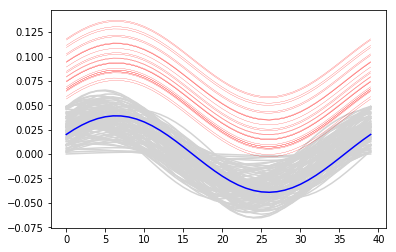

In [9]:
for i in range(Y.shape[0]):
    plt.plot(Y[i],c='lightgray')
for i in range(W.shape[0]):
    plt.plot(W[i],c='r', linewidth=0.2)
plt.plot(Y[1],c='b')

## Isolated anomalies:

### Dataset (a):

In [10]:
np.random.seed(42)
Z1 = np.zeros((anomalies_number, X.shape[1]))
for i in range(anomalies_number):
    k = np.random.choice(np.arange(Y.shape[0]))
    f = np.random.uniform(1,10)
    Z1[i] = X[k]
    l = np.random.choice(np.arange(X.shape[1]))
    K = np.random.uniform(5,10)
    Z1[i,l] += K 

isol_X1 = np.concatenate((X,Z1[:5]))
isol_X2 = np.concatenate((X,Z1[:10]))
isol_X3 = np.concatenate((X,Z1[:15]))
isol_X4 = np.concatenate((X,Z1[:20]))
isol_X5 = np.concatenate((X,Z1[:30]))

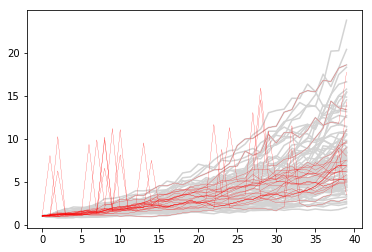

In [11]:
for i in range(X.shape[0]):
    plt.plot(X[i],c='lightgray')
for i in range(Z1.shape[0]):
    plt.plot(Z1[i],c='r', linewidth=0.2)

### Location anomalies with dataset (b)

In [12]:
S = pd.read_csv('xp_robu_repetition10_2.csv', header=None)
S = S.as_matrix()
S = S.reshape(2400)

S1 = np.zeros((100, 6, 4))
k = 0
for i in range(4):
    for j in range(6):
        S1[:,j, i] = S[(k * 100):((k+1) * 100)]
        k +=1

In [13]:
KT_FCHD2 = np.zeros(6)
KT_FSDO2 = np.zeros(6)
KT_FT2 = np.zeros(6)
KT_FIF2 = np.zeros(6)
for i in range(6):
    G1 = np.zeros(len(S1[:, 0, 0]))
    V1 = np.zeros(len(S1[:, 0, 0]))
    G1[np.argsort(1-S1[:, 0, 0])] = np.arange(len(S1[:, i, 0]))
    V1[np.argsort(1-S1[:, i, 0])] = np.arange(len(S1[:, i, 0]))
    KT_FCHD2[i] = kendall_tau(G1, V1)
    
    G2 = np.zeros(len(S1[:, 0, 1]))
    V2 = np.zeros(len(S1[:, 0, 1]))
    G2[np.argsort(1-S1[:, 0, 1])] = np.arange(len(S1[:, i, 1]))
    V2[np.argsort(1-S1[:, i, 1])] = np.arange(len(S1[:, i, 1]))
    
    KT_FSDO2[i] = kendall_tau(G2,V2)
    
    G3 = np.zeros(len(S1[:, 0, 2]))
    V3 = np.zeros(len(S1[:, 0, 2]))
    G3[np.argsort(1-S1[:, 0, 2])] = np.arange(len(S1[:, i, 2]))
    V3[np.argsort(1-S1[:, i, 2])] = np.arange(len(S1[:, i, 2]))    
    
    KT_FT2[i] = kendall_tau(G3,V3)
    
    G4 = np.zeros(len(S1[:, 0, 3]))
    V4 = np.zeros(len(S1[:, 0, 3]))
    G4[np.argsort(1-S1[:, 0, 3])] = np.arange(len(S1[:, i, 3]))
    V4[np.argsort(1-S1[:, i, 3])] = np.arange(len(S1[:, i, 3]))        
    
    KT_FIF2[i] = kendall_tau(G4,V4)

In [14]:
KT_FCHD2

array([0.        , 0.00747475, 0.01535354, 0.0230303 , 0.04222222,
       0.05131313])

In [15]:
KT_FSDO2

array([0.        , 0.01535354, 0.03070707, 0.05111111, 0.08707071,
       0.11090909])

In [16]:
KT_FT2

array([0.        , 0.00626263, 0.01474747, 0.02989899, 0.06383838,
       0.08040404])

In [17]:
KT_FIF2

array([0.        , 0.13939394, 0.14525253, 0.15292929, 0.16222222,
       0.14989899])

### Isolated anoamlies with dataset (a)

In [18]:
S = pd.read_csv('xp_robu_repetition10_4.csv', header=None)
S = S.as_matrix()
S = S.reshape(2400)
S1 = np.zeros((100, 6, 4))
k = 0
for i in range(4):
    for j in range(6):
        S1[:,j, i] = S[(k * 100):((k+1) * 100)]
        k +=1

In [19]:
KT_FCHD4 = np.zeros(6)
KT_FSDO4 = np.zeros(6)
KT_FT4 = np.zeros(6)
KT_FIF4 = np.zeros(6)
for i in range(6):
    G1 = np.zeros(len(S1[:, 0, 0]))
    V1 = np.zeros(len(S1[:, 0, 0]))
    G1[np.argsort(1-S1[:, 0, 0])] = np.arange(len(S1[:, i, 0]))
    V1[np.argsort(1-S1[:, i, 0])] = np.arange(len(S1[:, i, 0]))
    KT_FCHD4[i] = kendall_tau(G1, V1)
    
    G2 = np.zeros(len(S1[:, 0, 1]))
    V2 = np.zeros(len(S1[:, 0, 1]))
    G2[np.argsort(1-S1[:, 0, 1])] = np.arange(len(S1[:, i, 1]))
    V2[np.argsort(1-S1[:, i, 1])] = np.arange(len(S1[:, i, 1]))
    
    KT_FSDO4[i] = kendall_tau(G2,V2)
    
    G3 = np.zeros(len(S1[:, 0, 2]))
    V3 = np.zeros(len(S1[:, 0, 2]))
    G3[np.argsort(1-S1[:, 0, 2])] = np.arange(len(S1[:, i, 2]))
    V3[np.argsort(1-S1[:, i, 2])] = np.arange(len(S1[:, i, 2]))    
    
    KT_FT4[i] = kendall_tau(G3,V3)
    
    G4 = np.zeros(len(S1[:, 0, 3]))
    V4 = np.zeros(len(S1[:, 0, 3]))
    G4[np.argsort(1-S1[:, 0, 3])] = np.arange(len(S1[:, i, 3]))
    V4[np.argsort(1-S1[:, i, 3])] = np.arange(len(S1[:, i, 3]))        
    
    KT_FIF4[i] = kendall_tau(G4,V4)

In [20]:
KT_FCHD4

array([0.        , 0.01252525, 0.01777778, 0.01575758, 0.02424242,
       0.03191919])

In [21]:
KT_FSDO4

array([0.        , 0.00909091, 0.01030303, 0.01090909, 0.01474747,
       0.01616162])

In [22]:
KT_FT4 

array([0.        , 0.01252525, 0.00848485, 0.00888889, 0.01131313,
       0.01494949])

In [23]:
KT_FIF4

array([0.        , 0.06888889, 0.07333333, 0.06969697, 0.08242424,
       0.0810101 ])

## Anomalies detection:

## Location Anomalies:

In [24]:
def Location_anomalies(X, param, data=1):
    np.random.seed(42)
    subsample = np.random.choice(np.arange(100), 15)
    Z = np.copy(X)
    Proportion_anom_detected = np.zeros((20,4))
    k=0
    for par in param:
        if (data == 1):
            Z[subsample] = X[subsample] + X[subsample] * par
        else:
            Z[subsample] = X[subsample] +  par

        FCHD0 = FCHD.FuncCHD(Z,times, Subsampling=True, J=3)
        S1 = FCHD0.compute_depth(Z)  
        S2 = functional_Stahel_Donoho(Z, Z)
        S3 = functional_Tukey(Z, Z)
        FIF0 = FIF.FIForest(Z, time=times, innerproduct='auto', D='cosinus')
        S4 = 1 - FIF0.compute_paths()


        Proportion_anom_detected[k ,0] = np.sum( 1.* (S1[subsample] < np.quantile(S1, 0.15)))
        Proportion_anom_detected[k ,1] = np.sum( 1.* (S2[subsample] < np.quantile(S2, 0.15)))
        Proportion_anom_detected[k ,2] = np.sum( 1.* (S3[subsample] < np.quantile(S3, 0.15)))
        Proportion_anom_detected[k ,3] = np.sum( 1.* (S4[subsample] < np.quantile(S4, 0.15)))
        k += 1

    return Proportion_anom_detected

In [25]:
param2 = np.linspace(0,0.06,20)
B1 = Location_anomalies(Y, param2, data=2)

## Isolated Anomalies:

In [26]:
def Isolated_anomalies(X, param, data=1):
    np.random.seed(42)
    subsample = np.random.choice(np.arange(100), 15)
    t = np.random.choice(np.arange(40), len(subsample))
    Z = np.copy(X)
    Proportion_anom_detected = np.zeros((20,4))
    k=0
    for par in param:
        if (data == 1):
            Z[subsample, t] = X[subsample, t] + X[subsample, t] * par
        else:
            Z[subsample, t] = X[subsample, t] +  par
            
        FCHD0 = FCHD.FuncCHD(Z,times, Subsampling=True, J=3)
        S1 = FCHD0.compute_depth(Z)  
        S2 = functional_Stahel_Donoho(Z, Z)
        S3 = functional_Tukey(Z, Z)
        FIF0 = FIF.FIForest(Z, time=times, innerproduct='auto', D='gaussian_wavelets')
        S4 = 1 - FIF0.compute_paths()


        Proportion_anom_detected[k ,0] = np.sum( 1.* (S1[subsample] < np.quantile(S1, 0.15)))
        Proportion_anom_detected[k ,1] = np.sum( 1.* (S2[subsample] < np.quantile(S2, 0.15)))
        Proportion_anom_detected[k ,2] = np.sum( 1.* (S3[subsample] < np.quantile(S3, 0.15)))
        Proportion_anom_detected[k ,3] = np.sum( 1.* (S4[subsample] < np.quantile(S4, 0.15)))
        k += 1
        
    return Proportion_anom_detected

In [27]:
param2 = np.linspace(0,0.2,20)
B2 = Isolated_anomalies(Y, param2, data=2)

Text(0.5, 0, 'b')

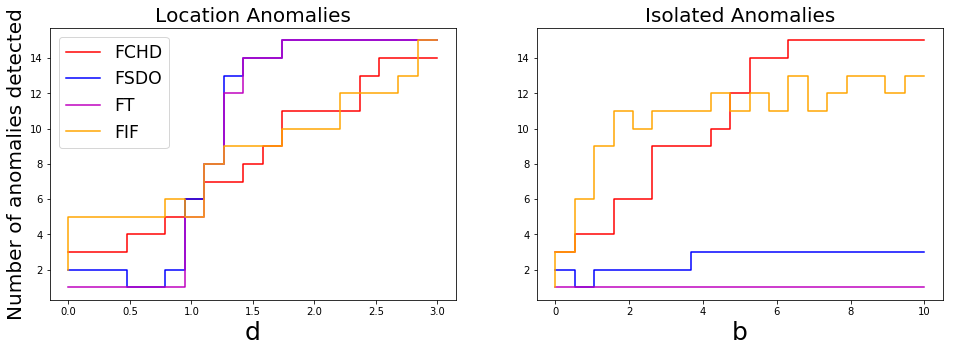

In [28]:
# Isolated anomalies dataset (b):
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Location Anomalies', size=20)
plt.step(np.linspace(0,3,20),B1[:,0], label = 'FCHD', c='r')
plt.step(np.linspace(0,3,20),B1[:,1], label = 'FSDO', c='b')
plt.step(np.linspace(0,3,20),B1[:,2], label = 'FT', c='m')
plt.step(np.linspace(0,3,20),B1[:,3], label = 'FIF', c='orange')
plt.ylabel('Number of anomalies detected', size=20)
plt.xlabel('d', size=25)
plt.legend(fontsize='xx-large')
plt.subplot(122)
plt.title('Isolated Anomalies', size=20)
plt.step(np.linspace(0,10,20),B2[:,0], label = 'FCHD', c='r')
plt.step(np.linspace(0,10,20),B2[:,1], label = 'FSDO', c='b')
plt.step(np.linspace(0,10,20),B2[:,2], label = 'FT', c='m')
plt.step(np.linspace(0,10,20),B2[:,3], label = 'FIF', c='orange')
plt.xlabel('b', size=25)


# Asymptotic variance:

In [30]:
S1_prem_0 = pd.read_csv('variance_premier_0_Jegal2.csv', header = None)
S1_prem_1  = pd.read_csv('variance_premier_1_Jegal2.csv', header = None)
S1_prem_2  = pd.read_csv('variance_premier_2_Jegal2.csv', header = None)
S1_prem_3  = pd.read_csv('variance_premier_3_Jegal2.csv', header = None)

S1_prem_0  = S1_prem_0.as_matrix()
S1_prem_1  = S1_prem_1.as_matrix()
S1_prem_2  = S1_prem_2.as_matrix()
S1_prem_3  = S1_prem_3.as_matrix()

S2_deux_0 = pd.read_csv('variance_deux_0_Jegal2.csv', header = None)
S2_deux_1  = pd.read_csv('variance_deux_1_Jegal2.csv', header = None)
S2_deux_2  = pd.read_csv('variance_deux_2_Jegal2.csv', header = None)
S2_deux_3  = pd.read_csv('variance_deux_3_Jegal2.csv', header = None)

S2_deux_0  = S2_deux_0.as_matrix()
S2_deux_1  = S2_deux_1.as_matrix()
S2_deux_2  = S2_deux_2.as_matrix()
S2_deux_3  = S2_deux_3.as_matrix()

S1_exact_prem_0 = S1_prem_0[:100]
S1_approx_prem_0 = S1_prem_0[100:200]


S1_exact_prem_1 = S1_prem_1[:100]
S1_approx_prem_1 = S1_prem_1[100:200]


S1_exact_prem_2 = S1_prem_2[:100]
S1_approx_prem_2 = S1_prem_2[100:200]


S1_exact_prem_3 = S1_prem_3[:100]
S1_approx_prem_3 = S1_prem_3[100:200]



S2_exact_deux_0 = S2_deux_0[:100]
S2_approx_deux_0 = S2_deux_0[100:200]


S2_exact_deux_1 = S2_deux_1[:100]
S2_approx_deux_1 = S2_deux_1[100:200]


S2_exact_deux_2 = S2_deux_2[:100]
S2_approx_deux_2 = S2_deux_2[100:200]


S2_exact_deux_3 = S2_deux_3[:100]
S2_approx_deux_3 = S2_deux_3[100:200]


In [31]:
def boxplot_variance(A,B,ticks):
    s = 0.2
    
    
    c2 = "green"
    bp2 = plt.boxplot(A,  vert = False, 
                widths = np.array([s,s,s,s,s,s,s]),
                patch_artist = True, notch = True
                ,positions = [1.05,2.05,3.05,4.05,5.05,6.05,7.05])
    
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp2[item], color=c2)
    plt.setp(bp2["boxes"], facecolor=c2)
    plt.setp(bp2["fliers"], markeredgecolor=c2)
    
    bp1 = plt.boxplot(B, vert = False, 
                widths = np.array([s,s,s,s,s,s,s]),
                patch_artist = True, notch = True
                ,positions = [1.45,2.45,3.45,4.45,5.45,6.45,7.45] )
    c1 = "orange"
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp1[item], color=c1)
    plt.setp(bp1["boxes"], facecolor=c1)
    plt.setp(bp1["fliers"], markeredgecolor=c1)

    
    plt.ylim(0.5,8)
    plt.legend([ bp2["boxes"][0],bp1["boxes"][0]], [' Exact', ' Approx'], 
               fontsize= "large" )

    plt.yticks(np.array([1.25,2.25,3.25,4.25,5.25,6.25,7.25]),ticks, size=15)
    plt.xticks(size=12)

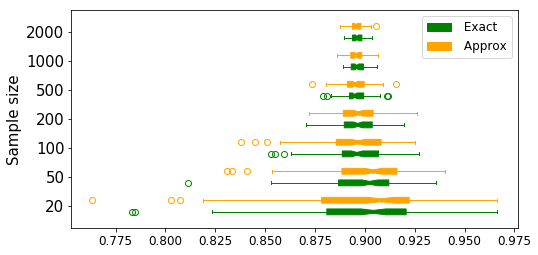

In [33]:
plt.figure(figsize=(8,4))
ticks = [20, 50, 100, 200, 500, 1000, 2000]
boxplot_variance(S1_exact_prem_0,S1_approx_prem_0,ticks)
plt.ylabel('Sample size',size=15)
#plt.xlabel('Depth score',size=15)
plt.show()



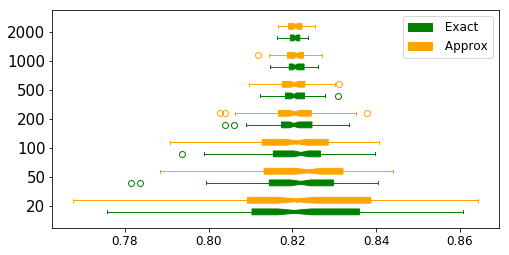

In [34]:
plt.figure(figsize=(8,4))

boxplot_variance(S1_exact_prem_1,S1_approx_prem_1,ticks)

Text(0.5, 0, 'Depth score')

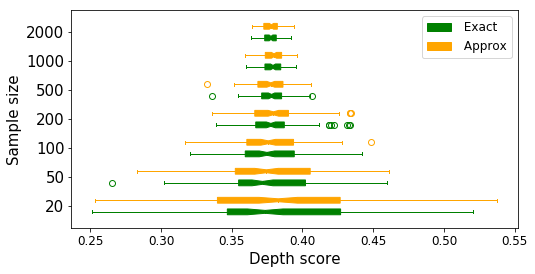

In [35]:
plt.figure(figsize=(8,4))

boxplot_variance(S1_exact_prem_2,S1_approx_prem_2,ticks)
plt.ylabel('Sample size',size=15)
plt.xlabel('Depth score',size=15)

Text(0.5, 0, 'Depth score')

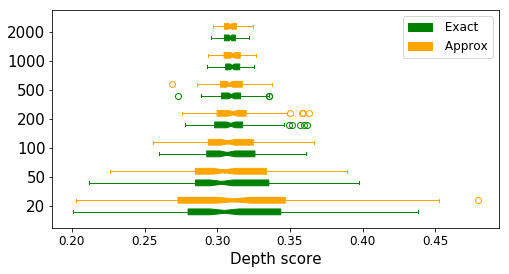

In [36]:
plt.figure(figsize=(8,4))

boxplot_variance(S1_exact_prem_3,S1_approx_prem_3,ticks)
plt.xlabel('Depth score',size=15)

Text(0, 0.5, 'Sample size')

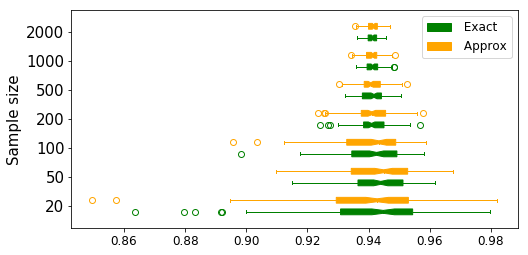

In [37]:
plt.figure(figsize=(8,4))

boxplot_variance(S2_exact_deux_0,S2_approx_deux_0,ticks)
plt.ylabel('Sample size',size=15)

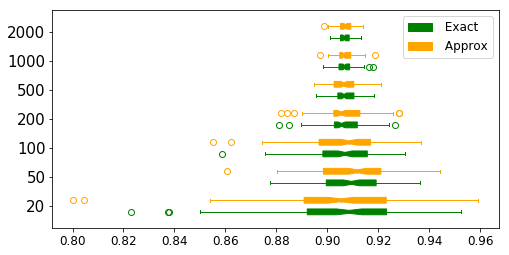

In [38]:
plt.figure(figsize=(8,4))

boxplot_variance(S2_exact_deux_1,S2_approx_deux_1,ticks)

Text(0.5, 0, 'Depth score')

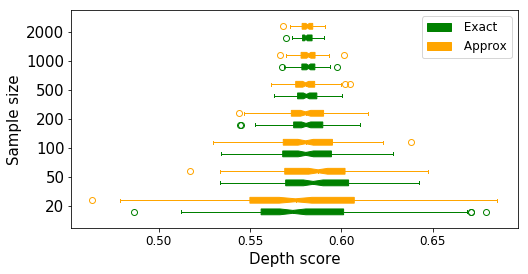

In [39]:
plt.figure(figsize=(8,4))

boxplot_variance(S2_exact_deux_2,S2_approx_deux_2,ticks)
plt.ylabel('Sample size',size=15)
plt.xlabel('Depth score',size=15)

Text(0.5, 0, 'Depth score')

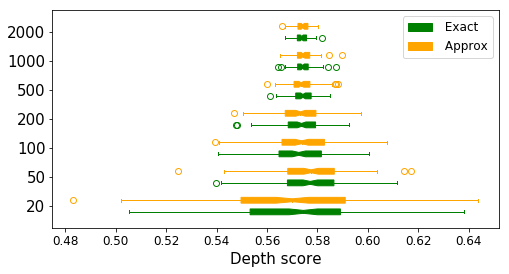

In [40]:
plt.figure(figsize=(8,4))

boxplot_variance(S2_exact_deux_3,S2_approx_deux_3,ticks)
plt.xlabel('Depth score',size=15)